<a href="https://colab.research.google.com/github/HasibAlMuzdadid/Machine-Learning-and-Deep-Learning-Projects/blob/main/cat%20recognizer%20using%20logistic%20regression/cat_recognizer_(logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cat Recognizer using Logistic Regression classifier**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py                # for interacting with a dataset that is stored on an H5 file

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3)

where, 

* m_train (number of training examples)
* m_test (number of test examples)
* num_px (height, width of a training image)






In [ ]:
print(f"Train Set[Features] Shape: {train_set_x_orig.shape}")
print(f"Test Set[Features] Shape: {test_set_x_orig.shape}")
print(f"Train Set[Labels] Shape: {train_set_y.shape}")
print(f"Test Set[Labels] Shape: {test_set_y.shape}")
print(f"Number of training examples: {train_set_x_orig.shape[0]}")
print(f"Number of testing examples: {test_set_y.shape[0]}")
print(f"Height/Width of each image: {train_set_x_orig.shape[1]}")
print(f"Each image is of size: ({train_set_x_orig.shape[1]}, {train_set_x_orig.shape[2]}, {train_set_x_orig.shape[3]})")

Train Set[Features] Shape: (209, 64, 64, 3)
Test Set[Features] Shape: (50, 64, 64, 3)
Train Set[Labels] Shape: (1, 209)
Test Set[Labels] Shape: (1, 50)
Number of training examples: 209
Number of testing examples: 1
Height/Width of each image: 64
Each image is of size: (64, 64, 3)


Each line of train_set_x_orig and test_set_x_orig is an array representing an image. One can visualize an example by running the following code by changing the value of 'index'

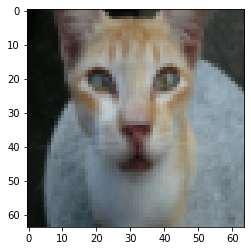

In [ ]:
# Example of a picture
index = 11
plt.imshow(train_set_x_orig[index])
plt.show()

**Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px  ∗  num_px  ∗  3, 1).**

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b ∗ c ∗ d, a) is to use:

X_flatten = X.reshape(X.shape[0], -1).T 
        
*X.T is the transpose of X*

In [ ]:
# Reshape the training and test examples
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


print(f"Train Set[Features] shape: {(train_set_x_flatten.shape)}")
print(f"Train Set[Labels] shape: {(train_set_y.shape)}")
print(f"Test Set[Features] shape: {(test_set_x_flatten.shape)}")
print(f"Test Set[Labels] shape: {(test_set_y.shape)}")

Train Set[Features] shape: (12288, 209)
Train Set[Labels] shape: (1, 209)
Test Set[Features] shape: (12288, 50)
Test Set[Labels] shape: (1, 50)


To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize  dataset, meaning that substracting the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).


In [ ]:
# Standardize the Datasets
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

**It's time to design a simple algorithm to distinguish cat images from non-cat images.**

we will build a Logistic Regression, using a Neural Network mindset. 


**Mathematical expression of the algorithm:**

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b $$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

As we need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ for making predictions.

In [ ]:
# Defining some helper functions

# sigmoid function
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s


# Initializing with zeros
def initialize_with_zeros(x):
  w = np.zeros((x, 1))
  b = 0
  return w, b

For Forward Propagation:
- we get X
- we compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- we calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas we will  use: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [ ]:
# Implementing a function propagate() that computes the cost function and its gradient

def propagate(w, b, X, Y):
  m = X.shape[1]

  # FORWARD PROPAGATION (FROM X TO COST)
  A = sigmoid(np.dot(w.T, X) + b)  # compute activation
  cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost

  # BACKWARD PROPAGATION (TO FIND GRAD)
  dw = (1 / m) * np.dot(X, (A - Y).T)
  db = (1 / m) * np.sum(A - Y)

  cost = np.squeeze(np.array(cost))

    
  grads = {"dw": dw,
           "db": db}
    
  return grads, cost

Now the goal is to learn  𝑤  and  𝑏  by minimizing the cost function  𝐽 . For a parameter  𝜃 , the update rule is  𝜃:=𝜃−𝛼 𝑑𝜃 , where  𝛼  is the learning rate.

In [ ]:
# Optimizing w and b
import copy
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
  
  w = copy.deepcopy(w)
  b = copy.deepcopy(b)
    
  costs = []

  for i in range(num_iterations):
    
    grads, cost = propagate(w, b, X, Y)

    # Retrieve derivatives from grads
    dw = grads["dw"]
    db = grads["db"]

    # update rule
    w = w - learning_rate * dw  
    b = b - learning_rate * db

    # Record the costs
    if i % 100 == 0:     
      costs.append(cost)
        
      # Print the cost every 100 training iterations
      if print_cost==True:
        print(f"Cost after iteration {i}: {cost}")

  params = {"w": w,
            "b": b}
    
  grads = {"dw": dw,
           "db": db}
    
  return params, grads, costs

There are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries  into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`.

In [ ]:
# predicting the labels for a dataset X.
def predict(w, b, X):

  m = X.shape[1]
  Y_prediction = np.zeros((1, m))
  w = w.reshape(X.shape[0], 1)

  # Computing vector "A"for predicting the probabilities of a cat being present in the picture
  A = sigmoid(np.dot(w.T, X) + b)

  for i in range(A.shape[1]):
    Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

  return Y_prediction

In [ ]:
# Defining the model

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
  w, b = initialize_with_zeros(X_train.shape[0])
    
  parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
  w = parameters["w"]
  b = parameters["b"]
    
  Y_prediction_test = predict(w, b, X_test)
  Y_prediction_train = predict(w, b, X_train)


  # Print train/test Errors
  if print_cost:
    print(f"Train accuracy: {round((100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100), ndigits=2)}%")
    print(f"Test accuracy: {round((100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100), ndigits=2)} %")

  d = {"costs": costs,
       "Y_prediction_test": Y_prediction_test, 
       "Y_prediction_train" : Y_prediction_train, 
       "w" : w, 
       "b" : b,
       "learning_rate" : learning_rate,
       "num_iterations": num_iterations}
    
  return d


In [ ]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5845083636993086
Cost after iteration 200: 0.46694904094655476
Cost after iteration 300: 0.37600686694802077
Cost after iteration 400: 0.3314632893282512
Cost after iteration 500: 0.30327306747438293
Cost after iteration 600: 0.27987958658260487
Cost after iteration 700: 0.26004213692587574
Cost after iteration 800: 0.2429406846779662
Cost after iteration 900: 0.22800422256726063
Cost after iteration 1000: 0.21481951378449635
Cost after iteration 1100: 0.20307819060644985
Cost after iteration 1200: 0.19254427716706862
Cost after iteration 1300: 0.18303333796883503
Cost after iteration 1400: 0.17439859438448874
Train accuracy: 97.61%
Test accuracy: 70.0 %


Training accuracy is close to 100%. This is a good sanity check: The model is working and has high enough capacity to fit the training data. Test accuracy is 70%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier.

Also, you see that the model is clearly overfitting the training data. We can reduce overfitting by using regularization.

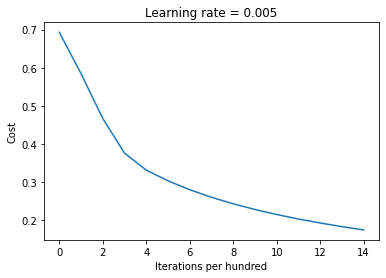

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model["costs"])
plt.plot(costs)
plt.xlabel("Iterations per hundred")
plt.ylabel("Cost")
plt.title(f"Learning rate = {logistic_regression_model['learning_rate']}")
plt.show()

Training a model with learning rate: 0.01
Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.8239208681633668
Cost after iteration 200: 0.4189444730732313
Cost after iteration 300: 0.6173497040862219
Cost after iteration 400: 0.5221157718693101
Cost after iteration 500: 0.38770874886462703
Cost after iteration 600: 0.23625445675942175
Cost after iteration 700: 0.15422213306565732
Cost after iteration 800: 0.13532782831487397
Cost after iteration 900: 0.12497148000327057
Cost after iteration 1000: 0.1164783312573286
Cost after iteration 1100: 0.10919251128239282
Cost after iteration 1200: 0.10280446418272415
Cost after iteration 1300: 0.09712981008013837
Cost after iteration 1400: 0.09204326923671569
Train accuracy: 99.52%
Test accuracy: 68.0 %

 -------------------------------------------------------

Training a model with learning rate: 0.001
Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5912894260003538
Cost after iteration 200: 0.55579611

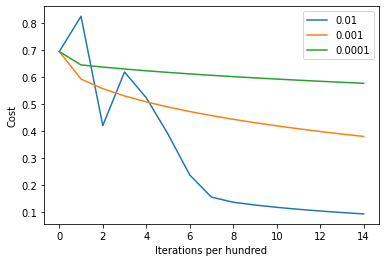

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print (f"Training a model with learning rate: {lr}")
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=True)
    print (f"\n -------------------------------------------------------\n")

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.xlabel("Iterations per hundred")
plt.ylabel("Cost")

legend = plt.legend(loc="upper right", shadow=False)
# frame = legend.get_frame()
# frame.set_facecolor('0.90')
plt.show()